# Case Study on Correlation and Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
d = pd.read_csv('Add_sales_data_2018.csv')
d.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


### 1. check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [2]:
s = d['Add1(in Thousands)']+d['Add2(in Thousands)']+d['Add3(in Thousands)']+d['Add4(in Thousands)']+d['Add5(in Thousands)']
d['total_cost'] = s
d1 = d[['Profit(in Thousands)','total_cost']]
d1 = d1.sort_values('Profit(in Thousands)')
d1.head()

,Profit(in Thousands),total_cost
1,4042.448,1060.95
0,4093.065,1068.25
15,4152.066,1097.00
16,4175.677,1095.10
20,4178.008,1106.30


Text(0, 0.5, 'Profit in Thousands')

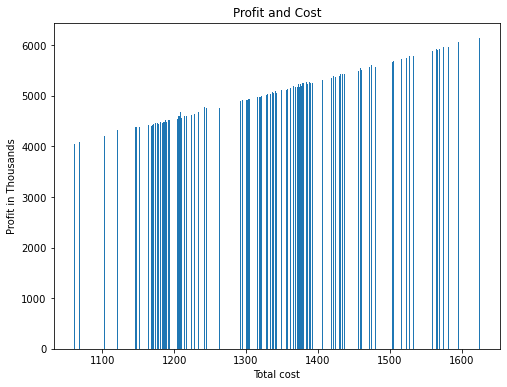

In [3]:
plt.figure(figsize=(8,6))
plt.title('Profit and Cost')
plt.bar(d1['total_cost'],d1['Profit(in Thousands)'])
plt.xlabel('Total cost')
plt.ylabel('Profit in Thousands')

 ### Insight
* Profit increase with respect to the amount spent for advertisement.

### 2.  Build a regression model to predict the profit from the given data and comment your findings on it.

In [4]:
t = pd.read_csv('Add_sales_data_2018.csv')

<AxesSubplot:title={'center':'Profit and Add cost Heatmap'}>

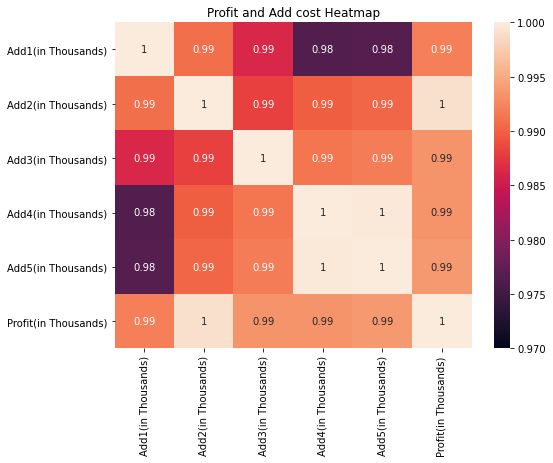

In [5]:
c_m = t.corr()
plt.figure(figsize=(8,6))
plt.title('Profit and Add cost Heatmap')
sns.heatmap(c_m,vmin=.97,vmax=1,annot=True)


In [10]:
y = t['Profit(in Thousands)']
x = t.drop(['Add5(in Thousands)','Date','Profit(in Thousands)'],axis=1)
x.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands)
0,208.00,222.25,206.85,216.00
1,217.00,218.60,205.90,210.25
2,223.50,227.80,216.15,217.25
3,230.00,237.50,225.75,226.45
4,234.55,234.60,221.05,230.30


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [12]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
m = lr.fit(x_train,y_train)
p = m.predict(x_test)

In [13]:
from sklearn.metrics import mean_squared_error as mse
print('MSE is',mse(y_test,p))

MSE is 0.5381640443756968


### Insight
* Add1, Add4 and Add5 have same correlation. Add5 have less correlation with Profit.So Add5 column dropped from table.
* Then, Mean squared error = 0.538

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement. 
* Add1(in Thousands) 290
* Add2(in Thousands) 312
* Add3(in Thousands) 309
* Add4(in Thousands) 298
* Add5(in Thousands) 320

In [14]:
mk = [[290,312,309,298]]
m.predict(mk).item()

5801.736693174622

### Insight
* The predicted value of profit is: 5801.74